In [1]:
# Figure S5
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import kde
import matplotlib
import os
from scipy import stats
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rc('font',family='Arial')

# File locations

# CHANGE THIS PATH TO THE PATH TO THE REPOSITORY
# REPOSITORY AVAILABLE AT https//doi.org/10.4121/19948253
repository_directory = r'M:\tnw\bn\nd\Shared\Daniel\Manuscripts\2022 CMG activation paper data and analysis\RamirezMontero et al_NatComm_2023_data'

ATP_data = os.path.join(repository_directory, r'Raw single-molecule data\Single color experiments\WT CMG\CQ_ATP.csv')
NOATP_data = os.path.join(repository_directory, r'Raw single-molecule data\Single color experiments\WT CMG\CQ_NONUCLEOTIDE.csv')
ATPgS_data = os.path.join(repository_directory, r'Raw single-molecule data\Single color experiments\WT CMG\CQ_ATPgS.csv')


# Open files

df_ATP= pd.read_csv(ATP_data)
df_NOATP=pd.read_csv(NOATP_data)
df_ATPgS=pd.read_csv(ATPgS_data)

# General filters

DNA_len_kbp=23.582 # Set DNA length (kbp)
dist_from_beads=1 # Set distance (kbp) from beads for filtering
N_frames_to_average=3 # set how many frames to average for initial position plots
max_initial_frame=3 # set maximum frame number at which a trace can start

# Set bin width in kb for position plots
binsize=0.70
bins=np.arange(0, DNA_len_kbp/2, binsize)

# Filter by stoichiometry
min_stoich=1 # set minimum stoichiometry allowed
max_stoich=5 # set maximum stoichiometry allowed

df_ATP_filtered = df_ATP.loc[df_ATP['step_count']>=min_stoich].copy()
df_ATP_filtered = df_ATP_filtered.loc[df_ATP_filtered['step_count']<=max_stoich].copy()
df_ATP_filtered = df_ATP_filtered[~df_ATP_filtered['step_count'].isna()]

df_NOATP_filtered = df_NOATP.loc[df_NOATP['step_count']>=min_stoich].copy()
df_NOATP_filtered = df_NOATP_filtered.loc[df_NOATP_filtered['step_count']<=max_stoich].copy()
df_NOATP_filtered = df_NOATP_filtered[~df_NOATP_filtered['step_count'].isna()]

df_ATPgS_filtered = df_ATPgS.loc[df_ATPgS['step_count']>=min_stoich].copy()
df_ATPgS_filtered = df_ATPgS_filtered.loc[df_ATPgS_filtered['step_count']<=max_stoich].copy()
df_ATPgS_filtered = df_ATPgS_filtered[~df_ATPgS_filtered['step_count'].isna()]


C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:317: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


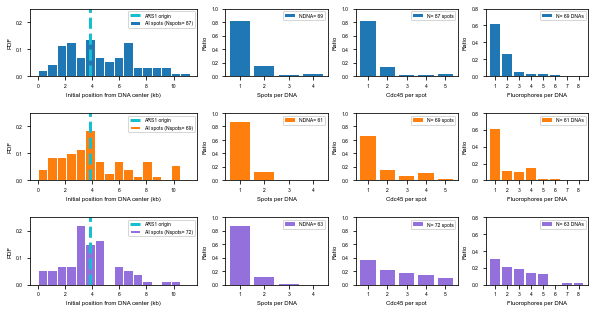

In [2]:
# Figure S5

edgecolor='white'

fig = plt.figure(figsize=(10, 7))
gs = matplotlib.gridspec.GridSpec(4, 9, wspace=0.75, hspace=0.55)


ax1 = fig.add_subplot(gs[0, 0:3])
ax5 = fig.add_subplot(gs[1, 0:3])
ax9 = fig.add_subplot(gs[2, 0:3])

ax2 = fig.add_subplot(gs[0, 3:5])
ax6 = fig.add_subplot(gs[1, 3:5])
ax10 = fig.add_subplot(gs[2, 3:5])

ax3 = fig.add_subplot(gs[0, 5:7])
ax7 = fig.add_subplot(gs[1, 5:7])
ax11 = fig.add_subplot(gs[2, 5:7])

ax4 = fig.add_subplot(gs[0, 7:9])
ax8 = fig.add_subplot(gs[1, 7:9])
ax12 = fig.add_subplot(gs[2, 7:9])

# ATP data

# panel a

initial_locs= []

for scan_id, df_scan in df_ATP_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc)

initial_locs_np= np.array(initial_locs)
locs_from_center= abs(initial_locs_np-(DNA_len_kbp/2))

weights=np.zeros_like(locs_from_center)+1./locs_from_center.size
ax1.hist(locs_from_center, bins=bins, weights=weights, range=(0, DNA_len_kbp/2), edgecolor=edgecolor, facecolor='tab:blue')
ax1.set_ylabel('PDF', fontsize=6)
ax1.set_ylim(0, 0.25)
ax1.set_xticks(np.arange(0,DNA_len_kbp/2,2))
ax1.set_yticks(np.arange(0, 0.22, 0.1))
ax1.axvline(3.860, color='tab:cyan', linestyle='dashed', linewidth=3) # Highlight origin
ax1.legend(['ARS1 origin','All spots (Nspots= '+str(len(locs_from_center))+')'], loc='upper right', fontsize=5)
ax1.set_xlabel(r'Initial position from DNA center (kb)', size=6)


# panel b

spots_per_DNA = [] # list of spot/DNA, sum of all stoichs for each DNA
stoichiometries=[] # list of all stoichiometrie of all the spots

for scan_id, df_scan in df_ATP_filtered.groupby('scan_id'):
    spots_this_DNA=[]
    stoichiometries_this_DNA=[]
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            spots_this_DNA.append(1)
            stoich_this_spot=[df_trace['step_count'].iloc[0]]
            stoichiometries_this_DNA.extend(stoich_this_spot)
            stoichiometries.extend(stoich_this_spot)
    stoichiometries_this_DNA.sort()          
    total_spots_DNA=np.sum(spots_this_DNA)
    sum_stoichs_this_DNA=np.sum(stoichiometries_this_DNA)
    spots_per_DNA.append((total_spots_DNA, sum_stoichs_this_DNA))
    
# convert spots per DNA to string

spots_per_DNA_array = np.array([tup[0] for tup in spots_per_DNA])
spots_per_DNA_array=spots_per_DNA_array[spots_per_DNA_array>0]

# Plot spot counts
labels, counts = np.unique(spots_per_DNA_array, return_counts=True)
ax2.bar(labels, counts/len(spots_per_DNA_array), facecolor='tab:blue')
ax2.set_ylabel('Ratio', fontsize=6)
ax2.set_xlabel('Spots per DNA', fontsize=6)
ax2.legend(['NDNA= '+str(len(spots_per_DNA_array))], loc='upper right', fontsize=5)
ax2.set_ylim([0,1])
ax2.set_xticks(np.arange(1,5,1))
ax2.set_yticks(np.arange(0,1.1,0.2))

# panel c
labels, counts = np.unique(stoichiometries, return_counts=True)
ax3.bar(labels, counts/len(stoichiometries), facecolor='tab:blue')
ax3.set_ylabel('Ratio', fontsize=6)
ax3.set_xlabel('Cdc45 per spot', fontsize=6)
ax3.legend(['N= '+str(len(stoichiometries))+' spots'], loc='upper right', fontsize=5)
ax3.set_ylim([0,1])
ax3.set_xticks(np.arange(1,6,1))
ax3.set_yticks(np.arange(0,1.1,0.2))

# panel d
fluorophores_per_DNA_array = np.array([tup[1] for tup in spots_per_DNA])
fluorophores_per_DNA_array=fluorophores_per_DNA_array[fluorophores_per_DNA_array>0]
labels, counts = np.unique(fluorophores_per_DNA_array, return_counts=True)
ax4.bar(labels, counts/len(fluorophores_per_DNA_array), facecolor='tab:blue')
ax4.set_ylabel('Ratio', size=6)
ax4.set_xlabel('Fluorophores per DNA', fontsize=6)
ax4.legend(['N= '+str(len(fluorophores_per_DNA_array))+' DNAs'], loc='upper right', fontsize=5)
ax4.set_ylim([0,0.8])
ax4.set_yticks(np.arange(0,1,0.2))
ax4.set_xticks(np.arange(1,9,1))
ax4.bar(7,0) # added to make x axes the same as for panel i
ax4.bar(8,0) # added to make x axes the same as for panel i


# NO NUCLEOTIDE data

# panel e

initial_locs= []
for scan_id, df_scan in df_NOATP_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc) 
            
initial_locs_np= np.array(initial_locs)
locs_from_center= abs(initial_locs_np-(DNA_len_kbp/2))

weights=np.zeros_like(locs_from_center)+1./locs_from_center.size
ax5.hist(locs_from_center, bins=bins, weights=weights, range=(0, DNA_len_kbp/2), edgecolor=edgecolor, facecolor='tab:orange')
ax5.set_ylabel('PDF', fontsize=6)
ax5.set_ylim(0, 0.25)
ax5.set_xticks(np.arange(0,DNA_len_kbp/2,2))
ax5.set_yticks(np.arange(0, 0.22, 0.1))
ax5.axvline(3.860, color='tab:cyan', linestyle='dashed', linewidth=3) # Highlight origin
ax5.legend(['ARS1 origin','All spots (Nspots= '+str(len(locs_from_center))+')'], loc='upper right', fontsize=5)
ax5.set_xlabel(r'Initial position from DNA center (kb)', size=6)


# panel f

spots_per_DNA = [] # list of spot/DNA, sum of all stoichs for each DNA
stoichiometries=[] # list of all stoichiometrie of all the spots

    
for scan_id, df_scan in df_NOATP_filtered.groupby('scan_id'):
    spots_this_DNA=[]
    stoichiometries_this_DNA=[]
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            spots_this_DNA.append(1)
            stoich_this_spot=[df_trace['step_count'].iloc[0]]
            stoichiometries_this_DNA.extend(stoich_this_spot)
            stoichiometries.extend(stoich_this_spot)
    stoichiometries_this_DNA.sort()          
    total_spots_DNA=np.sum(spots_this_DNA)
    sum_stoichs_this_DNA=np.sum(stoichiometries_this_DNA)
    spots_per_DNA.append((total_spots_DNA, sum_stoichs_this_DNA))
    

#Convert spots per DNA to string

spots_per_DNA_array = np.array([tup[0] for tup in spots_per_DNA])
spots_per_DNA_array=spots_per_DNA_array[spots_per_DNA_array>0]

# Plot spot counts
labels, counts = np.unique(spots_per_DNA_array, return_counts=True)
ax6.bar(labels, counts/len(spots_per_DNA_array), facecolor='tab:orange')
ax6.set_ylabel('Ratio', fontsize=6)
ax6.set_xlabel('Spots per DNA', fontsize=6)
ax6.legend(['NDNA= '+str(len(spots_per_DNA_array))], loc='upper right', fontsize=5)
ax6.set_ylim([0,1])
ax6.set_xticks(np.arange(1,5,1))
ax6.set_yticks(np.arange(0,1.1,0.2))
ax6.bar(3,0) # added to make x axes the same as for panel b
ax6.bar(4,0) # added to make x axes the same as for panel b


# panel g
labels, counts = np.unique(stoichiometries, return_counts=True)
ax7.bar(labels, counts/len(stoichiometries), facecolor='tab:orange')
ax7.set_ylabel('Ratio', fontsize=6)
ax7.set_xlabel('Cdc45 per spot', fontsize=6)
ax7.legend(['N= '+str(len(stoichiometries))+' spots'], loc='upper right', fontsize=5)
ax7.set_ylim([0,1])
ax7.set_xticks(np.arange(1,6,1))
ax7.set_yticks(np.arange(0,1.1,0.2))

# panel h
fluorophores_per_DNA_array = np.array([tup[1] for tup in spots_per_DNA])
fluorophores_per_DNA_array=fluorophores_per_DNA_array[fluorophores_per_DNA_array>0]
labels, counts = np.unique(fluorophores_per_DNA_array, return_counts=True)
ax8.bar(labels, counts/len(fluorophores_per_DNA_array), facecolor='tab:orange')
ax8.set_ylabel('Ratio', size=6)
ax8.set_xlabel('Fluorophores per DNA', fontsize=6)
ax8.legend(['N= '+str(len(fluorophores_per_DNA_array))+' DNAs'], loc='upper right', fontsize=5)
ax8.set_ylim([0,0.8])
ax8.set_yticks(np.arange(0,1,0.2))
ax8.set_xticks(np.arange(1,9,1))
ax8.bar(7,0) # added to make x axes the same as for panel i
ax8.bar(8,0) # added to make x axes the same as for panel i



# ATPgS data

# panel i

initial_locs= []

for scan_id, df_scan in df_ATPgS_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc) 
            
            
initial_locs_np= np.array(initial_locs)
locs_from_center= abs(initial_locs_np-(DNA_len_kbp/2))


weights=np.zeros_like(locs_from_center)+1./locs_from_center.size
ax9.hist(locs_from_center, bins=bins, weights=weights, range=(0, DNA_len_kbp/2), edgecolor=edgecolor, facecolor='mediumpurple')
ax9.set_ylabel('PDF', fontsize=6)
ax9.set_ylim(0, 0.25)
ax9.set_xticks(np.arange(0,DNA_len_kbp/2,2))
ax9.set_yticks(np.arange(0, 0.22, 0.1))
ax9.axvline(3.860, color='tab:cyan', linestyle='dashed', linewidth=3) # Highlight origin
ax9.legend(['ARS1 origin','All spots (Nspots= '+str(len(locs_from_center))+')'], loc='upper right', fontsize=5)
ax9.set_xlabel(r'Initial position from DNA center (kb)', size=6)


# panel j

spots_per_DNA = [] # list of spot/DNA, sum of all stoichs for each DNA
stoichiometries=[] # list of all stoichiometrie of all the spots

    
for scan_id, df_scan in df_ATPgS_filtered.groupby('scan_id'):
    spots_this_DNA=[]
    stoichiometries_this_DNA=[]
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            spots_this_DNA.append(1)
            stoich_this_spot=[df_trace['step_count'].iloc[0]]
            stoichiometries_this_DNA.extend(stoich_this_spot)
            stoichiometries.extend(stoich_this_spot)
    stoichiometries_this_DNA.sort()          
    total_spots_DNA=np.sum(spots_this_DNA)
    sum_stoichs_this_DNA=np.sum(stoichiometries_this_DNA)
    spots_per_DNA.append((total_spots_DNA, sum_stoichs_this_DNA)) 
    

#Convert spots per DNA to string

spots_per_DNA_array = np.array([tup[0] for tup in spots_per_DNA])
spots_per_DNA_array=spots_per_DNA_array[spots_per_DNA_array>0]

# Plot spot counts
labels, counts = np.unique(spots_per_DNA_array, return_counts=True)
ax10.bar(labels, counts/len(spots_per_DNA_array), facecolor='mediumpurple')
ax10.set_ylabel('Ratio', fontsize=6)
ax10.set_xlabel('Spots per DNA', fontsize=6)
ax10.legend(['NDNA= '+str(len(spots_per_DNA_array))], loc='upper right', fontsize=5)
ax10.set_ylim([0,1])
ax10.set_xticks(np.arange(1,5,1))
ax10.set_yticks(np.arange(0,1.1,0.2))
ax10.bar(4,0) # added to make x axes the same as for panel b

# panel k
labels, counts = np.unique(stoichiometries, return_counts=True)
ax11.bar(labels, counts/len(stoichiometries), facecolor='mediumpurple')
ax11.set_ylabel('Ratio', fontsize=6)
ax11.set_xlabel('Cdc45 per spot', fontsize=6)
ax11.legend(['N= '+str(len(stoichiometries))+' spots'], loc='upper right', fontsize=5)
ax11.set_ylim([0,1])
ax11.set_xticks(np.arange(1,6,1))
ax11.set_yticks(np.arange(0,1.1,0.2))

# panel l
fluorophores_per_DNA_array = np.array([tup[1] for tup in spots_per_DNA])
fluorophores_per_DNA_array=fluorophores_per_DNA_array[fluorophores_per_DNA_array>0]
labels, counts = np.unique(fluorophores_per_DNA_array, return_counts=True)
ax12.bar(labels, counts/len(fluorophores_per_DNA_array), facecolor='mediumpurple')
ax12.set_ylabel('Ratio', size=6)
ax12.set_xlabel('Fluorophores per DNA', fontsize=6)
ax12.legend(['N= '+str(len(fluorophores_per_DNA_array))+' DNAs'], loc='upper right', fontsize=5)
ax12.set_ylim([0,0.8])
ax12.set_yticks(np.arange(0,1,0.2))
ax12.set_xticks(np.arange(1,9,1))


# Finish up and save.
ax1.tick_params(axis='x', labelsize=5)
ax2.tick_params(axis='x', labelsize=5)
ax3.tick_params(axis='x', labelsize=5)
ax4.tick_params(axis='x', labelsize=5)
ax5.tick_params(axis='x', labelsize=5)
ax6.tick_params(axis='x', labelsize=5)
ax7.tick_params(axis='x', labelsize=5)
ax8.tick_params(axis='x', labelsize=5)
ax9.tick_params(axis='x', labelsize=5)
ax10.tick_params(axis='x', labelsize=5)
ax11.tick_params(axis='x', labelsize=5)
ax12.tick_params(axis='x', labelsize=5)

ax1.tick_params(axis='y', labelsize=5)
ax2.tick_params(axis='y', labelsize=5)
ax3.tick_params(axis='y', labelsize=5)
ax4.tick_params(axis='y', labelsize=5)
ax5.tick_params(axis='y', labelsize=5)
ax6.tick_params(axis='y', labelsize=5)
ax7.tick_params(axis='y', labelsize=5)
ax8.tick_params(axis='y', labelsize=5)
ax9.tick_params(axis='y', labelsize=5)
ax10.tick_params(axis='y', labelsize=5)
ax11.tick_params(axis='y', labelsize=5)
ax12.tick_params(axis='y', labelsize=5)


# Cleanup.
plt.tight_layout()
# plt.savefig('FS5.PDF', dpi=600)
plt.show()
plt.close()
